In [10]:
% matplotlib nbagg
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.spatial.distance import euclidean
from sklearn import datasets
from sklearn.cluster import KMeans
import random
random.seed(3222)
np.random.seed(3222)

## 2.1 Basic K-means

In [2]:
def assign_points_to_clusters(centroids, points, k):
    # 1 list for each centroid (will contain indices of points)
    clusters = [[] for i in range(k)]
    for i in range(points.shape[0]):
        # find nearest centroid to this point
        best_centroid = 0
        best_distance = euclidean(centroids[best_centroid], points[i])
        for c in range(1, k):
            distance = euclidean(centroids[c], points[i])
            if distance < best_distance:
                best_distance = distance
                best_centroid = c
        clusters[best_centroid].append(i)
    return clusters

def update_centroids(centroids, clusters, points, k):
    for ci in range(k):
        if clusters[ci]:
            sum_points = np.zeros(points.shape[1])
            for point in clusters[ci]:
                sum_points += points[point]
                #print sum_points
            centroids[ci] = sum_points/len(clusters[ci])

def mykmeans(points, k, max_iter=50, centroids=None):
    n_samples, n_features = points.shape
    if not centroids:
        centroids = [points[x] for x in random.sample(range(n_samples), k)]
        # seeds = random_state.permutation(n_samples)[:k]
    clusters = None
    for p in range(max_iter):
        clusters = assign_points_to_clusters(centroids, points, k)
        update_centroids(centroids, clusters, points, k)
    return centroids, clusters
        

In [14]:
k = 2
iris = datasets.load_iris()
points = iris.data[100:150, [1,2]]

clusters: [1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0]
centroids: [[ 2.85483871  5.21290323]
 [ 3.16842105  6.10526316]]


<IPython.core.display.Javascript object>


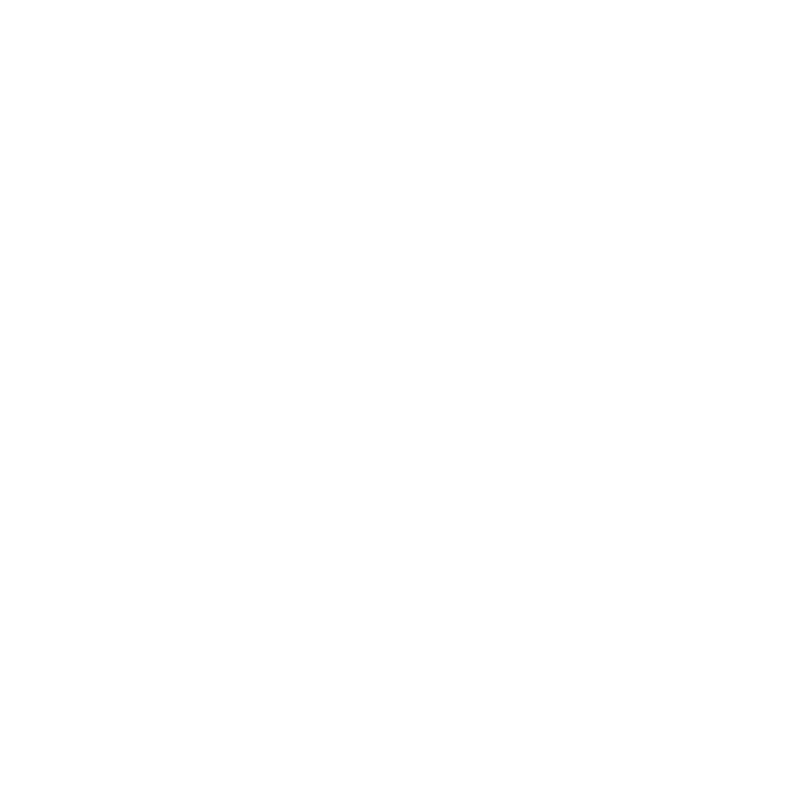

TypeError: 'numpy.int32' object is not iterable

In [15]:
'''centroids, clusters = mykmeans(points, k)'''
kmeans = KMeans(n_clusters=k)
kmeans.fit(points)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_
print "clusters:", clusters
print "centroids:", centroids

plt.figure(figsize=(10,10))
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
for cluster in clusters:    
    plt.scatter([points[item][0] for item in cluster], [points[item][1] for item in cluster], color=next(colors) )
    #for point in cluster:
        #plt.annotate(str(point), (points[point][0], points[point][1]))
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], c='black')

Qn. Plot the data-points and the obtained centroids, using different colors for each cluster. Play
with the number of clusters, vary k from 1 to a large number. What happens when k is large?
What happens when k is small? Is it easy for you to draw conclusions from the different runs of
your algorithm on this fixed dataset? What’s problematic with your current algorithm?  
Ans. It's difficult to draw conclusions because of the randomness of the algorithm.

## 2.2 K-means multi-run

In [11]:
def kmeans_objective(centroids, clusters, points, k):
    cost = 0
    for ci in range(len(clusters)):
        for k in range(len(clusters[ci])):
                cost += euclidean(points[clusters[ci][k]], centroids[ci])
    return cost

def mykmeans_multi(points, k, r):
    best_output = None
    best_score = float('inf')
    for run in range(r):
        centroids, clusters = mykmeans(points, k)
        #print "centroids: ", centroids
        score = kmeans_objective(centroids, clusters, points, k)
        #print "score: ", score
        if score < best_score:
            best_score = score
            best_output = (centroids, clusters)
    return best_output
        

clusters: [[1, 6, 10, 11, 13, 14, 19, 21, 23, 26, 27, 33, 38, 41, 42, 45, 46, 47, 49], [5, 7, 18, 22], [3, 8, 12, 15, 16, 28, 32, 34, 37, 39, 40, 48], [0, 2, 4, 20, 24, 25, 29, 30, 35, 36, 43, 44], [9, 17, 31]]
centroids: [array([ 2.78947368,  5.01052632]), array([ 2.825,  6.625]), array([ 2.95833333,  5.53333333]), array([ 3.14166667,  5.85833333]), array([ 3.73333333,  6.4       ])]


<IPython.core.display.Javascript object>


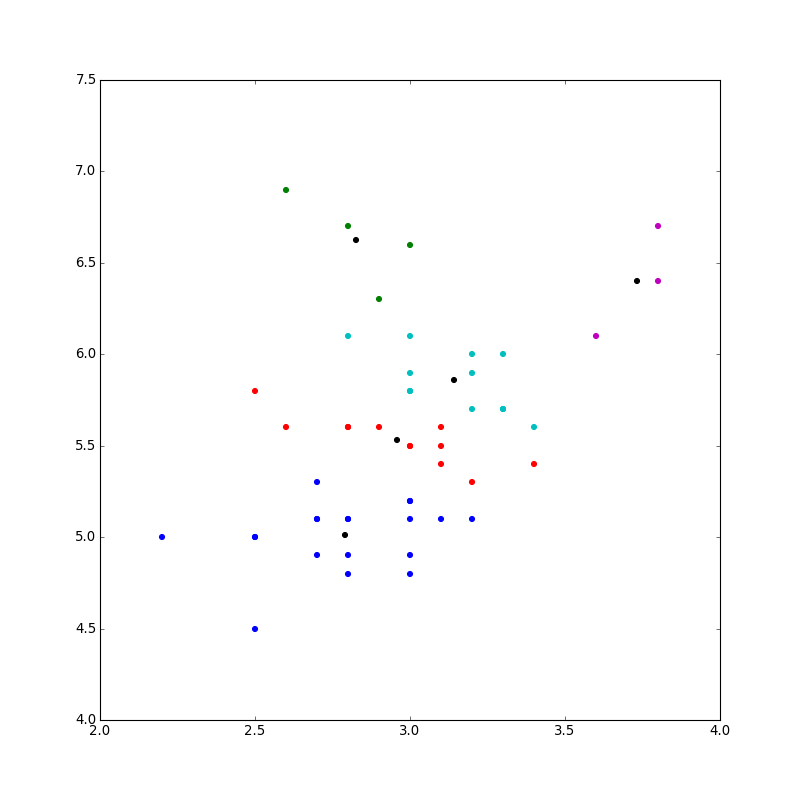

In [12]:
centroids, clusters = mykmeans_multi(points, k, 100)
print "clusters:", clusters
print "centroids:", centroids

plt.figure(figsize=(10,10))
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
for cluster in clusters:    
    plt.scatter([points[item][0] for item in cluster], [points[item][1] for item in cluster], color=next(colors) )
    #for point in cluster:
        #plt.annotate(str(point), (points[point][0], points[point][1]))
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], c='black')

## 2.3 K-means ++

In [13]:
def mykmeansplusplus(points, k, max_iter=50):
    n_samples, n_features = points.shape
    centroids = []
    centroids.append(np.random.randint(0, n_samples))
    for i in range(k-1):
        weightProb = []
        leftPoints = [p for p in range(n_samples) if p not in centroids]
        for p in leftPoints:
            best_D = euclidean(points[p], points[centroids[0]])
            best_p = centroids[0]
            for c in range(1, len(centroids)):
                D = euclidean(points[p], points[centroids[c]])
                if D < best_D:
                    best_D = D
            weightProb.append(best_D)
        cum = sum(weightProb)
        weightProb = [p/cum for p in weightProb]
        centroids.append(np.random.choice(leftPoints, p=weightProb))
    centroids = [points[c] for c in centroids]
    return mykmeans(points, k, max_iter, centroids)
    

clusters: [[8, 11, 13, 19, 34, 46], [0, 2, 4, 9, 20, 24, 25, 29, 30, 35, 36, 43, 44], [1, 6, 14, 21, 23, 26, 27, 33, 38, 42], [3, 10, 12, 15, 16, 28, 32, 37, 39, 40, 41, 45, 47, 48, 49], [5, 7, 17, 18, 22, 31]]
centroids: [array([ 2.5       ,  5.28333333]), array([ 3.17692308,  5.87692308]), array([ 2.78,  4.92]), array([ 3.04666667,  5.38      ]), array([ 3.15,  6.6 ])]


<IPython.core.display.Javascript object>


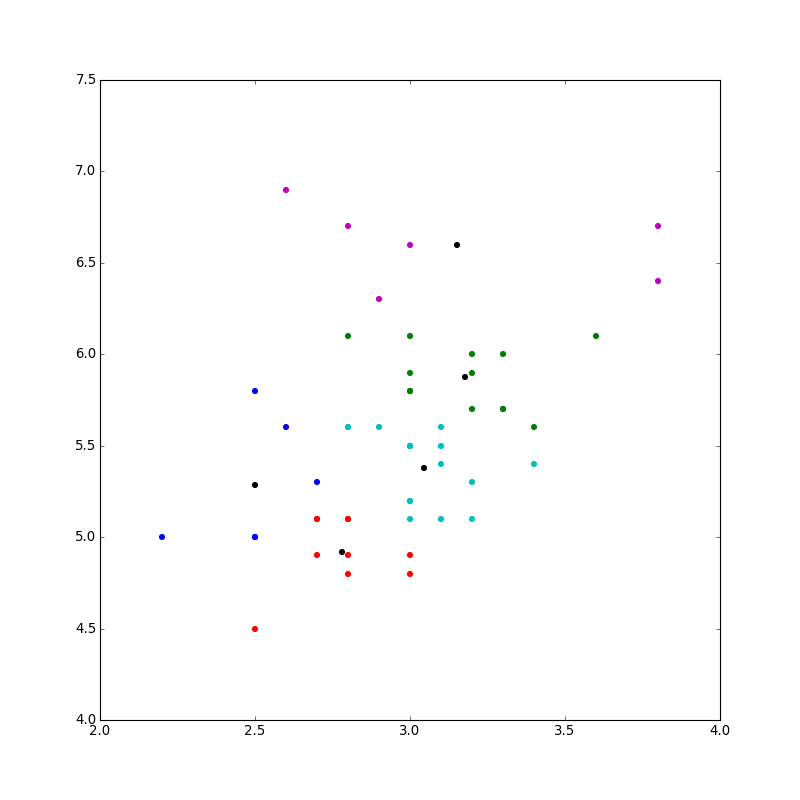

In [14]:
centroids, clusters = mykmeansplusplus(points, k)
print "clusters:", clusters
print "centroids:", centroids

plt.figure(figsize=(10,10))
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
for cluster in clusters:    
    plt.scatter([points[item][0] for item in cluster], [points[item][1] for item in cluster], color=next(colors) )
    #for point in cluster:
        #plt.annotate(str(point), (points[point][0], points[point][1]))
plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], c='black')